In [43]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import nltk

C:\Users\achyu\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("D:\\Learnbay\\NLP\\Notes\\Mental Health Dataset.csv")
df.head()

,posts,predicted,intensity
0,I know as parent of child with down syndrome t...,negative,-1
1,but in my heart I know this is the future prom...,neutral,0
2,I have mylefibrosis which turn to leukemia the...,negative,-1
3,from one of my health group subject wayne dyer...,neutral,0
4,gmos now link to leukemia http nsnbc I 2013 07...,neutral,0


In [4]:
df['intensity'].value_counts()

 0    4375
-1    4112
-2    1155
 1     750
Name: intensity, dtype: int64

In [5]:
df['predicted'].value_counts()

neutral          4375
negative         4112
very negative    1155
positive          750
Name: predicted, dtype: int64

In [6]:
df.shape

(10392, 3)

In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

posts        1
predicted    0
intensity    0
dtype: int64

In [9]:
df = df.dropna()

In [10]:
df.shape

(10391, 3)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10391 entries, 0 to 10391
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   posts      10391 non-null  object
 1   predicted  10391 non-null  object
 2   intensity  10391 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 324.7+ KB


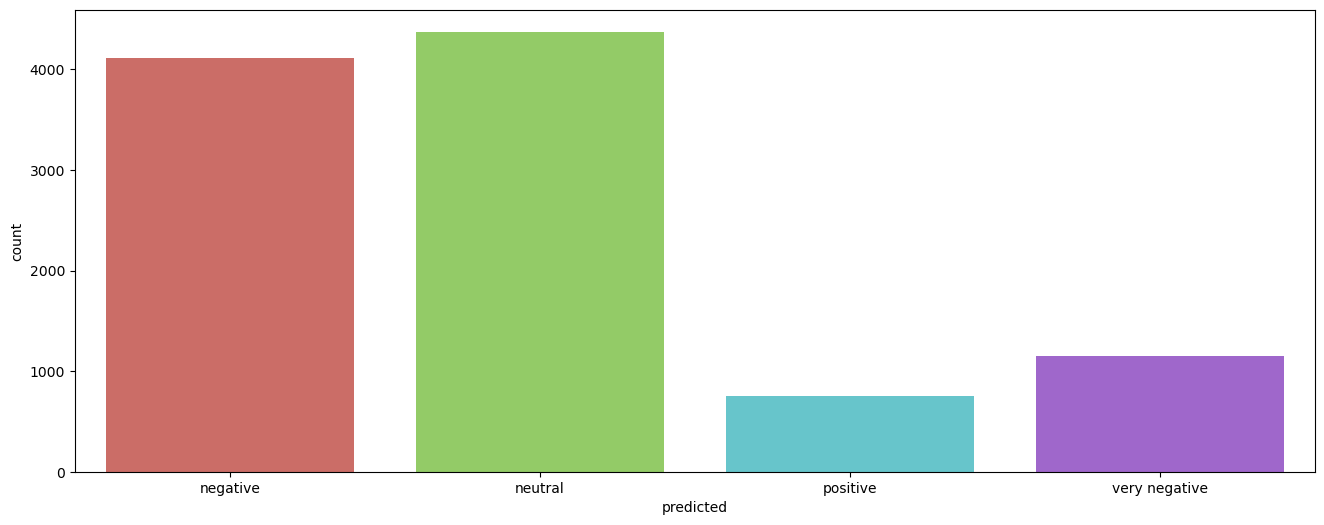

In [12]:
plt.figure(figsize = (16,6))
sns.countplot(df['predicted'],data =df,palette ='hls')
plt.show()

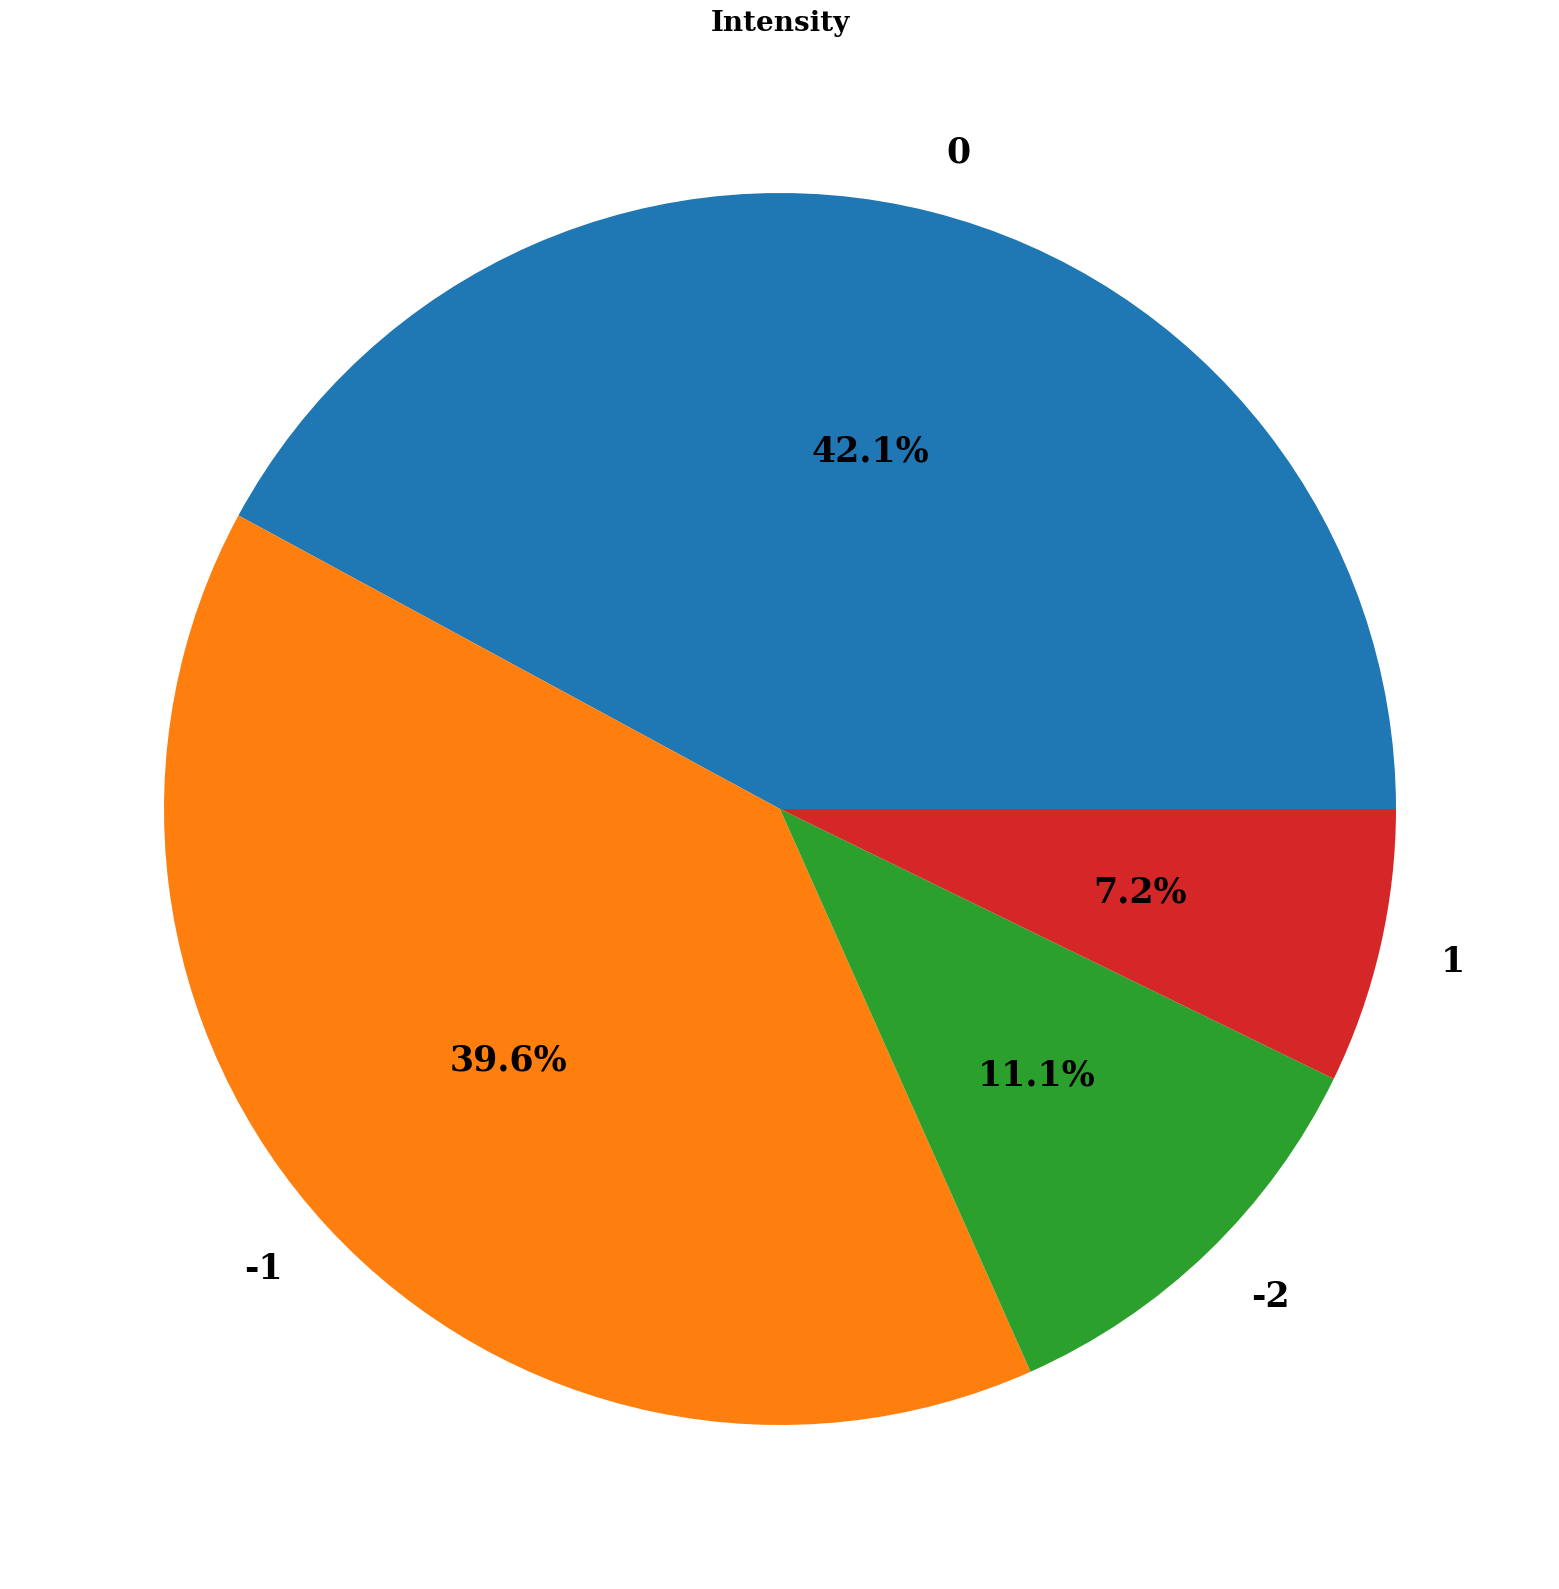

In [13]:
plt.figure(figsize = (30,20))
plt.pie(df['intensity'].value_counts(),labels = df['intensity'].value_counts().index,
       autopct ='%1.1f%%',textprops = {'fontsize':25,'color':'black','weight':'bold','family':'serif'})
hfont = {'fontname':'serif','weight':'bold'}
plt.title("Intensity",size =20, **hfont)
plt.show()

In [ ]:
# As the data is imbalance, we have to balance it and we have to further procedure

In [14]:
df_new= df.copy()

In [15]:
def clean_text(text):
    text = text.lower()
    return text.strip()

In [16]:
df_new['posts'] = df_new['posts'].apply(lambda x:clean_text(x))
df_new['posts'] 

0        i know as parent of child with down syndrome t...
1        but in my heart i know this is the future prom...
2        i have mylefibrosis which turn to leukemia the...
3        from one of my health group subject wayne dyer...
4        gmos now link to leukemia http nsnbc i 2013 07...
                               ...                        
10387    hey everyone i am a 25 year old male i work ou...
10388    have surgery for stage 1 colon cancer 1 year a...
10389    the doctor advise we he could not remove the a...
10390    my 66 year old father have been through so muc...
10391    i have bein have a bloody stool since last yea...
Name: posts, Length: 10391, dtype: object

In [17]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [18]:
def remove_punctuation(text):
    punctuation_free = "".join([i for i in text if i not in string.punctuation])
    return punctuation_free

In [19]:
df_new['posts'].head(10)

0    i know as parent of child with down syndrome t...
1    but in my heart i know this is the future prom...
2    i have mylefibrosis which turn to leukemia the...
3    from one of my health group subject wayne dyer...
4    gmos now link to leukemia http nsnbc i 2013 07...
5    here is a link for an interesting article and ...
6    genetic difference associate with outcome in a...
7    cll survival rate statistical information chro...
8    the third know human retrovirus xmrv seem to b...
9    leukemia survivor meet his bone marrow donor w...
Name: posts, dtype: object

In [20]:
df_new['posts'] = df_new['posts'].apply(lambda x:remove_punctuation(x))
df_new['posts'].head(10)

0    i know as parent of child with down syndrome t...
1    but in my heart i know this is the future prom...
2    i have mylefibrosis which turn to leukemia the...
3    from one of my health group subject wayne dyer...
4    gmos now link to leukemia http nsnbc i 2013 07...
5    here is a link for an interesting article and ...
6    genetic difference associate with outcome in a...
7    cll survival rate statistical information chro...
8    the third know human retrovirus xmrv seem to b...
9    leukemia survivor meet his bone marrow donor w...
Name: posts, dtype: object

In [21]:
import re

In [22]:
"""
def tokenization(text):
    tokens = re.split('W+',text)
    return tokens
"""    

"\ndef tokenization(text):\n    tokens = re.split('W+',text)\n    return tokens\n"

In [23]:
#df_new['posts'] = df_new['posts'].apply(lambda x:tokenization(x))

In [24]:
#df_new['posts']

In [25]:
df_new['posts'][25]

'dear colleague i would like to ask what is well method for cml after tki treatment routine karyotyping or fish because i am try to do karyotype for cml patient after tki and i get no metaphase could it be influeance of tki whereas karyotypes for other leukemia go perfect thank you for share your experience vaida'

In [26]:
stopwords =nltk.corpus.stopwords.words('english')
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [27]:
def remove_stopwords(text):
    output = " ".join(word for word in text.split() if word.lower() not in stopwords)
    return output

In [28]:
df_new['posts'] = df_new['posts'].apply(lambda x:remove_stopwords(x))

In [35]:
df_new['posts'][1]

#stopwords removed

'heart know future promise article regardless http ottawa ctvnew ottawa researcher hopeful nano particle cure leukemia 1 1409330 ottawa researcher hopeful nano particle cure leukemia medical breakthrough ctv joanne schnurr homegrown research close cure leukemia medical leader around world eye ottawa blood cancer breakthrough ottawa doctor talk cure doctor ottawa research institute call major finding battle blood cancer leukemia share 8 text share print share email 0 joanne schnurr ctv ottawa publish tuesday august 13 2013 4 05pm edt last update tuesday august 13 2013 6 22pm edt ottawa researcher cautiously use word cure talk new research leukemia research new long way help human patient mouse develop tiny particle lab cause cancerous white blood cell kill patient acute myeloid leukemia stem cell transplant heavy chemotherapy hope cure even survival rate among bad cancer 22 happen inside lab ottawa hospital research institute give new hope though cure even tough type leukemia doctor dav

In [39]:
# Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer =WordNetLemmatizer() 

In [40]:
def lemmatizer(text):
    lemm_text = " ".join([wordnet_lemmatizer.lemmatize(word) for word in text.split()])
    return lemm_text

In [41]:
df_new['posts'] = df_new['posts'].apply(lambda x:lemmatizer(x))

In [42]:
df_new['posts'][1]

'heart know future promise article regardless http ottawa ctvnew ottawa researcher hopeful nano particle cure leukemia 1 1409330 ottawa researcher hopeful nano particle cure leukemia medical breakthrough ctv joanne schnurr homegrown research close cure leukemia medical leader around world eye ottawa blood cancer breakthrough ottawa doctor talk cure doctor ottawa research institute call major finding battle blood cancer leukemia share 8 text share print share email 0 joanne schnurr ctv ottawa publish tuesday august 13 2013 4 05pm edt last update tuesday august 13 2013 6 22pm edt ottawa researcher cautiously use word cure talk new research leukemia research new long way help human patient mouse develop tiny particle lab cause cancerous white blood cell kill patient acute myeloid leukemia stem cell transplant heavy chemotherapy hope cure even survival rate among bad cancer 22 happen inside lab ottawa hospital research institute give new hope though cure even tough type leukemia doctor dav

# Task

In [45]:
from nltk.corpus import movie_reviews
# download from nltk by using
#import nltk
#nltk.download()
# in that all packages

In [50]:
movie_reviews.fileids()

['neg/cv000_29416.txt',
 'neg/cv001_19502.txt',
 'neg/cv002_17424.txt',
 'neg/cv003_12683.txt',
 'neg/cv004_12641.txt',
 'neg/cv005_29357.txt',
 'neg/cv006_17022.txt',
 'neg/cv007_4992.txt',
 'neg/cv008_29326.txt',
 'neg/cv009_29417.txt',
 'neg/cv010_29063.txt',
 'neg/cv011_13044.txt',
 'neg/cv012_29411.txt',
 'neg/cv013_10494.txt',
 'neg/cv014_15600.txt',
 'neg/cv015_29356.txt',
 'neg/cv016_4348.txt',
 'neg/cv017_23487.txt',
 'neg/cv018_21672.txt',
 'neg/cv019_16117.txt',
 'neg/cv020_9234.txt',
 'neg/cv021_17313.txt',
 'neg/cv022_14227.txt',
 'neg/cv023_13847.txt',
 'neg/cv024_7033.txt',
 'neg/cv025_29825.txt',
 'neg/cv026_29229.txt',
 'neg/cv027_26270.txt',
 'neg/cv028_26964.txt',
 'neg/cv029_19943.txt',
 'neg/cv030_22893.txt',
 'neg/cv031_19540.txt',
 'neg/cv032_23718.txt',
 'neg/cv033_25680.txt',
 'neg/cv034_29446.txt',
 'neg/cv035_3343.txt',
 'neg/cv036_18385.txt',
 'neg/cv037_19798.txt',
 'neg/cv038_9781.txt',
 'neg/cv039_5963.txt',
 'neg/cv040_8829.txt',
 'neg/cv041_22364.txt',


In [48]:
len(movie_reviews.fileids())

2000

In [49]:
movie_reviews.words('neg/cv996_12447.txt')

['john', 'boorman', "'", 's', '"', 'zardoz', '"', 'is', ...]

In [51]:
complete_paragraph = ' '.join(movie_reviews.words('neg/cv996_12447.txt'))

In [52]:
complete_paragraph

'john boorman \' s " zardoz " is a goofy cinematic debacle so fundamentally misconceived and laughably executed that it takes on a bizarre enjoyment quality all its own . not since the rampant bumblings of one edward d . wood jr . has a movie been so silly and so serious at the same time . of course , wood \' s career can be explained by two things : he had no money and he had no talent . boorman , on the other hand , cannot court such excuses to explain " zardoz " ( or his follow - up film , the equally awful " exorcist ii : the heretic " ) . boorman obviously had a sizable budget , a matinee idol movie star ( sean connery ) in the lead role , and although you wouldn \' t know it from this film , boorman does indeed have talent . this is the man who made the slick modern masterpiece " deliverance " ( 1972 ) , as well as the autobiographical world war ii drama " hope and glory " ( 1987 ) , the slightly over - conceived arthurian epic " excalibur " ( 1981 ) and the father - son jungle a

In [33]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [34]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote,y_smote = smote.fit_resample(x,y)

ValueError: could not convert string to float: 'I know as parent of child with down syndrome that you have all hear that our child are at a high risk of leukemia as parent we read up on it and then say well that will not happen to my child well when will have just turn 2yr old he start bruise the thought of leukemia breafly cross my mind but I quickly push it out of my mind and rationalize it by say that he was a rough playing 2yr old and it was normal to bruise now and then I have just go to work a few month before and will have get a little more fussy and whinny but that is normal to right well then he get sick and like a lot of child with down when he get sick he get sick so we take he to the doc on a friday they say he have a cold and I tell my boss that he was sick and not to be surpise if I call and say he was in the hospital because they offten have to do that when he get sick she say ok and when sit get there sure enough he was much sicker and we take he to the er they tell we he have rsv and send we home with some med by the time we get home he was much bad and we take he back this time they order more test and put he in the hospital then my world start come down around I first they say that some of his blood work come back bad that they want to retest but it was probley nothing then that come back and they say they want to move he to icu just to keep a well I on he I start get scared that thought come back leukemia put again I try to push it out of my mind because no one want to think the bad well it was not long at all before the doc come in and say we believe william have leukemia they quickly fly he from beaumont tx to houston tx texas childrens hospital will is do really well now he is in remision but still have 3 1 2 yrs of chemo he was up run around but now can not walk anymore due to one of the chemos vinchristin but it will come back and he have just find other way to get around nothing is go to slow he dow I write all of this to say please do not dwell on it but if you see any symptom of leukemia in your child please get it check out it is well to find out because you are look for it than to find out like I and most other parent I have talk to by accident'